<a href="https://colab.research.google.com/github/OluwolePalmer/Sentiment-Analysis-Mike-Tyson-vs-Jake-Paul-2024-/blob/main/Sentiment_Analysis_of_YouTube_Comments_Mike_Tyson_vs_Jake_Paul_Fight_(2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis:**

*   Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral. It is also known as opinion mining.
*   Some use cases of sentiment analysis are: market research, improve customer service, brand monitoring, track campaign performance.


In this project, I demonstrated how to perform sentiment analysis by using basic understanding of data structures and algorithm. There are machine learning algorithms which can do this such as SVM, Naive Bayes, Random Forest, Neural Networks, but I won't be using any of these in this project.

See this project as a way of building your own training dataset to train a machine learning model in the future!


---




Acknowledgement:

https://aws.amazon.com/what-is/sentiment-analysis/#:~:text=Sentiment%20analysis%20is%20the%20process,social%20media%20comments%2C%20and%20reviews.





**Mike Tyson vs Jake Paul: A case Study**

Do you remember this fight in 2024? It generated so much buzz on and off the internet! For any combat sport, or entertainment event, much attention is paid to sentiments pre-fight and post-fight. It influences venue, ticket prices, sales, odds, rematch clause and stakes, etc.

Let's look at some comments mined from YouTube during the pre-fight (Mike Tyson vs Jake Paul; Source: IBMSkillsNetworkLab [download dataset here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/-H0BcPr512mhbTDDfkcTJA/comments-with-emotions.csv)). The word cloud below helps to visualize the frequently used words in the mined comments.

In [ ]:
#import necessary packages and file
from google.colab import files

uploaded = files.upload()

Saving comments_with_emotions.csv to comments_with_emotions.csv


In [ ]:
#import the csv file into a dataframe
df = pd.read_csv("comments_with_emotions.csv")

#view the first five observations in the dataframe
df.head()

,comment,like_count,published_at,author,sentiment,emotions,anger,fear,negative,positive,trust,anticipation,joy,surprise,sadness,disgust,positive_count
0,If this fight were real and not just an exhibi...,0,2024-10-26T01:19:27Z,@thesecond4113,Positive,"{'anger': 3, 'fear': 3, 'negative': 2, 'positi...",3.0,3.0,2.0,8.0,7.0,6.0,5.0,2.0,2.0,1.0,1
1,Tyson will bust his hide. People forget with h...,0,2024-10-26T01:09:55Z,@bluesslider76,Neutral,"{'fear': 2, 'negative': 3, 'anticipation': 1, ...",1.0,2.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
2,We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥,0,2024-10-26T00:19:29Z,@thechaosmaster9934,Neutral,{},0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,Watching cm punk fight in the ufc is better th...,0,2024-10-26T00:16:10Z,@tokesenari,Positive,"{'anger': 2, 'fear': 1, 'negative': 1}",2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,Yall forget how much Ring IQ this guy has. AND...,0,2024-10-25T23:53:49Z,@HumbleAstronaut,Positive,"{'negative': 1, 'positive': 1, 'anticipation': 1}",0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1


In [ ]:
#import WordCloud and matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

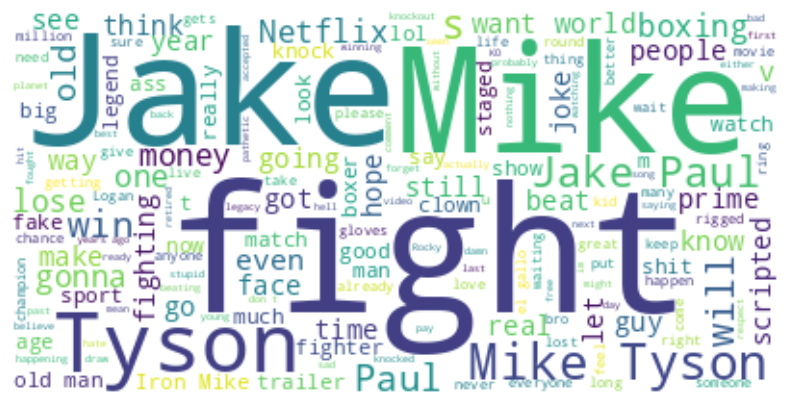

In [ ]:
#combine all comments into a single string
text = " ".join(x for x in df['comment'])

#visualize the text
word_cloud = WordCloud(background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(word_cloud, interpolation="bilinear", )
plt.axis("off")
plt.show()

The file imported already has the result of the sentiment analysis in df['sentiment']. What we want to do is to assume that this has not been done and try to determine the sentiment of the comments in the following steps:

**STEP 1**

Create a new dataframe from df but without the sentiment result nor emotions' features.

In [ ]:
comments = df[['comment', 'like_count',	'published_at',	'author']]
comments.head()

,comment,like_count,published_at,author
0,If this fight were real and not just an exhibi...,0,2024-10-26T01:19:27Z,@thesecond4113
1,Tyson will bust his hide. People forget with h...,0,2024-10-26T01:09:55Z,@bluesslider76
2,We signing the contract with this one 🗣🗣🗣🗣🔥🔥🔥🔥,0,2024-10-26T00:19:29Z,@thechaosmaster9934
3,Watching cm punk fight in the ufc is better th...,0,2024-10-26T00:16:10Z,@tokesenari
4,Yall forget how much Ring IQ this guy has. AND...,0,2024-10-25T23:53:49Z,@HumbleAstronaut


**STEP 2**

Define classes for words, weights and score each comment.

In [ ]:
#define classes based on length of comment and words in each comment
length = {'below_20':0, 'above_20':1}
pro = ['epic', 'terrific', '!', 'yes', 'go', 'beat', 'crush', 'smash', 'worth', 'money', 'good', 'legend', 'ready', 'netflix', 'fighting', 'young', 'great', 'back', 'iron', 'better', 'lose', 'knock', 'knockout' ]
con = ['bad', 'sad', 'terrible', 'fuck', 'clout', 'joke', 'play', 'dissapointed', 'stunt', 'down', 'hate', 'need', 'mock', 'old', 'hustle', 'fake', 'staged', 'shit']
generic = ['match', 'boxing', 'fight', 'even', 'same', 'equal', 'ring', 'show', 'exhibition']
common_words = ['a', 'an', 'as', 'at', 'if', 'in', 'is', 'it',' of', 'off', 'on', 'can', 'dad', 'had', 'back', 'and', 'get', 'big', 'him', 'his', 'not', 'got', 'up', 'mum', 'but', 'put', 'the', 'to', 'I', 'no', 'go', 'into', 'will', 'that', 'this', 'then', 'them', 'with', 'see', 'for', 'now', 'down', 'look', 'too', 'he', 'she', 'we', 'me', 'be', 'was', 'you', 'they', 'all', 'are', 'my', 'her']

#iterate through each comment and score the words
score = []
for comment in comments['comment']:
  corpus = comment.split(" ")

  l = [length['above_20'] if len(corpus) > 20 else length['below_20']]
  cw = 0
  g = 0
  p = 0
  c = 0
  o = 0

  for item in corpus:
    if item in common_words:
      cw += 1
    elif item in pro:
      p += 1
    elif item in con:
      c += 1
    elif item in generic:
      g += 1
    else:
      o += 1

  result = (cw*0 + p*1 + c*0 + g*0.5 + o*0.3 + l[0])/6

  """
  I have assigned weigths to the different classes as follows:
  common_words: 0
  pro: 1
  con: 0
  generic: 0.5
  others: 0.3
  length of corpus: dict.values() based on the length

  **The score of each comment is the mean of the word class counts multiplied by their weights**
  """

  score.append(result)
print(len(score)) #shows the number of comments that have been scored

1156


**STEP 3**

Define the classifier.

Classifier, Y = { 1/positive, if score > 0.55;
                  0.5/neutral, if score > 0.45 and score <= 0.55;
                  0/negative, if score <= 0.45}

In [ ]:
#classify each comment based on score
sentiment = []
for n in score:
  if n <= 0.45:
    sentiment.append('negative')
  elif n > 0.45 and n <= 0.55:
    sentiment.append('neutral')
  else:
    sentiment.append('positive')
print(len(sentiment)) #shows the number of comments that have been classified

1156


**STEP 4**

Visualize the sentiment analysis.

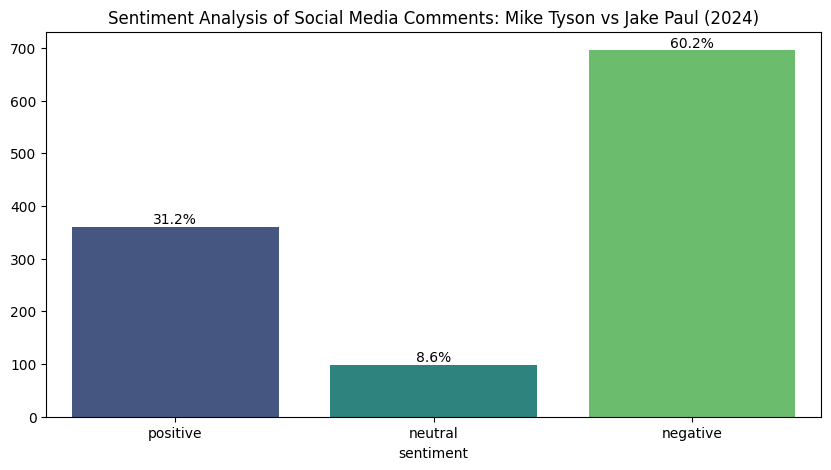

In [ ]:
#import Counter, pandas, matplotlib and seaborn
from collections import Counter
import pandas as pd
import seaborn as sns

#count the frequency of each sentiment class and print the save the result in a dataframe
counter = Counter(sentiment)
data = pd.DataFrame(sorted(counter.items(), reverse = True), columns = ['sentiment', 'frequency'])
# data.head()

#draw a barplot to show the distribution
plt.figure(figsize=(10,5))
plt.title("Sentiment Analysis of Social Media Comments: Mike Tyson vs Jake Paul (2024)")
chart = sns.barplot(data=data, x='sentiment', y='frequency', palette='viridis', hue='sentiment')
plt.ylabel('')

total = data['frequency'].sum()

#calculate percentages and add them to the plot
for k in chart.patches:
  percent = f'{100*k.get_height()/total:.1f}%'
  x = k.get_x() + k.get_width() /2
  y = k.get_height()
  chart.annotate(percent, (x,y), ha='center', va='bottom')

#show the plot
plt.show()

**STEP 5**

Label each comment in the original dataset and export for future use as a training dataset.

In [ ]:
#concat the sentiment analysis result to the dataframe
df_with_sentiment = pd.concat([comments, pd.Series(sentiment)], axis = 1)
df_with_sentiment.columns = ['comment', 'like_count', 'published_at', 'author', 'sentiment']
df_with_sentiment.tail()

,comment,like_count,published_at,author,sentiment
1151,WTF,0,2024-10-15T13:01:03Z,@ischubbypinkcheekscute8408,negative
1152,Is this real or a joke?,42,2024-10-15T13:01:00Z,@moondancecoffee,negative
1153,Bruh,0,2024-10-15T13:00:56Z,@H20_BadOnMyEnd,negative
1154,First comment 😂,0,2024-10-15T13:00:37Z,@josmith1184,negative
1155,Maa kasam jisne like subscribe na kiya wo exam...,1,2024-10-15T13:00:30Z,@hania.5911,positive


In [ ]:
#export to csv file
df_with_sentiment.to_csv('miketysonversusjakepaul_socialmediacomments_sentimentanalysis.csv')